<a href="https://colab.research.google.com/github/afit-csce623-master/demos/blob/main/demo_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This tutorial developed by W. Blair Watkinson II
# Apr 30, 2021

# Developed in support of education and research activities at 
# the Air Force Institute of Technology and the CSCE 623
# Machine Learning course

# For changes or questions, contact warren.watkinson@afit.edu

# MIT License

# Copyright (c) 2021 W. Blair Watkinson II

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

# Data Scaling and Transformation

This tutorial demonstrates various techniques for data scaling and transforming for machine learning.

## Generate regression data

The `generate_data` function generates gaussian, uniform, and categorical data and calculates a regression target. It also optionally exponentiates the target values. The function is provided for your review but the particulars are beyond the scope of this tutorial.

### Data generation function

In [2]:
import numpy as np
import pandas as pd
from IPython.display import Markdown as md
from IPython.display import display, Math, Latex

def generate_data(random_state, n_samples, 
                  n_gaussian_features, g_feature_mean_range, g_feature_sd_range,
                  n_uniform_features, u_feature_range,
                  categories, exponential_target):

    coefficient_range = [0, 5]

    X = pd.DataFrame()

    # generate gaussian features
    for idx in range(n_gaussian_features):
        X[f'G{idx+1}'] = random_state.normal(
            loc = random_state.uniform(*g_feature_mean_range), 
            scale = random_state.uniform(*g_feature_sd_range), 
            size = n_samples)


    # generate uniform features
    for idx in range(n_uniform_features):
        X[f'U{idx+1}'] = random_state.uniform(*u_feature_range, n_samples)

    # generate categorical features
    for idx, category_set in enumerate(categories):
        X[f'C{idx+1}'] = random_state.choice(category_set, n_samples)

    y = pd.DataFrame()
    y[0] = np.zeros(n_samples)


    coef = np.zeros(n_gaussian_features 
                    + sum([len(category_set) for category_set in categories]) 
                    + n_uniform_features)
    
    coef_pos = 0
    for idx, column in enumerate(X.columns):
        if column[0] == 'G' or column[0] == 'U':
            coef[coef_pos] = random_state.uniform(*coefficient_range)
            coef_pos += 1
            y[0] += X[column] * coef[idx]
        elif column[0] == 'C':
            temp = np.zeros(n_samples)
            for category_val in categories[int(column[1:])-1]:
                coef[coef_pos] = random_state.uniform(*coefficient_range)
                temp[X[column] == category_val] = coef[coef_pos]
                # with pd.option_context('display.max_rows', 2000, 'display.max_columns', 2000):
                #     display(f'X[{column}]', pd.DataFrame(X[column]).T)

                #     display('temp', pd.DataFrame(temp).T)
                coef_pos += 1
            y[0] += temp

            # print(categories[int(column[1:])-1])
            # print(len(categories[int(column[1:])-1]))
            # coef[idx] = random_state.uniform(*coefficient_range, len(categories[int(column[1:])-1]))
            # print(coef)

            # print(categories[int(column[1:])])
            # coef[idx] = random_state.uniform(*coefficient_range, categories[int(column[1:])])
            # print(coef)
            # y[0] += (X[column] == 'a') * coef[idx]

    # print(coef)
    intercept = random_state.uniform(g_feature_mean_range[1])

    y[0] = np.e ** y[0]

    return X, y, coef, intercept

## Generate data

Using the above function, we generate data with 2000 samples and 7 features: 3 with a normal distribution, 2 with a uniform distribution, and 2 with a categorical distribution.

In [3]:
random_state = np.random.RandomState(623)

n_samples = 2000
n_gaussian_features = 3
n_uniform_features = 2
g_feature_mean_range = [1, 5]
g_feature_sd_range = [1, 3]
u_feature_range = [0,5]
categories = [['a', 'b', 'c'], ['v', 'w', 'x', 'y', 'z']]

# print(sum([len(category_set) for category_set in categories]))
# print(*categories)


# for category_set in categories[1]:
#     display(category_set)

X, y, coef, intercept = generate_data(random_state, 
                                      n_samples, 
                                      n_gaussian_features, g_feature_mean_range, g_feature_sd_range, 
                                      n_uniform_features, u_feature_range,
                                      categories, True)

In [4]:
display(f'X: ', X)
display(f'y: ', y)

'X: '

,G1,G2,G3,U1,U2,C1,C2
0,6.754904,4.383600,3.699102,3.145859,1.678750,b,y
1,5.834529,2.478083,6.842155,0.110131,0.211036,b,w
2,-0.019920,5.148346,4.701757,0.418466,1.353766,b,w
3,6.100747,4.835442,2.565607,1.498564,0.080699,c,w
4,4.401672,2.800146,5.062265,3.333927,0.122657,b,v
...,...,...,...,...,...,...,...
1995,6.402820,5.245178,2.028098,4.111470,1.527076,a,w
1996,1.247847,0.261258,4.696588,2.271154,0.840323,c,z
1997,3.194544,1.267475,6.689624,0.002862,4.864324,b,w
1998,1.986392,2.687095,3.700734,4.526004,2.659952,b,x


'y: '

,0
0,5.650997e+24
1,1.251621e+19
2,5.224321e+13
3,1.338523e+19
4,1.573159e+19
...,...
1995,3.704787e+24
1996,2.302807e+12
1997,6.797808e+16
1998,5.038061e+19


## Sequester test data

Before analyzing our dataset, we will first sequester test data using the `train_test_split` function of the `scikit-learn` library.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)

## Analyze Data

Having removed our test data, we'll analyze the training set. A full analysis will be much more thorough, which will evaluate correlation and statistics for each feature, but for our purposes, we'll simply look at the histogram of each feature and the target.

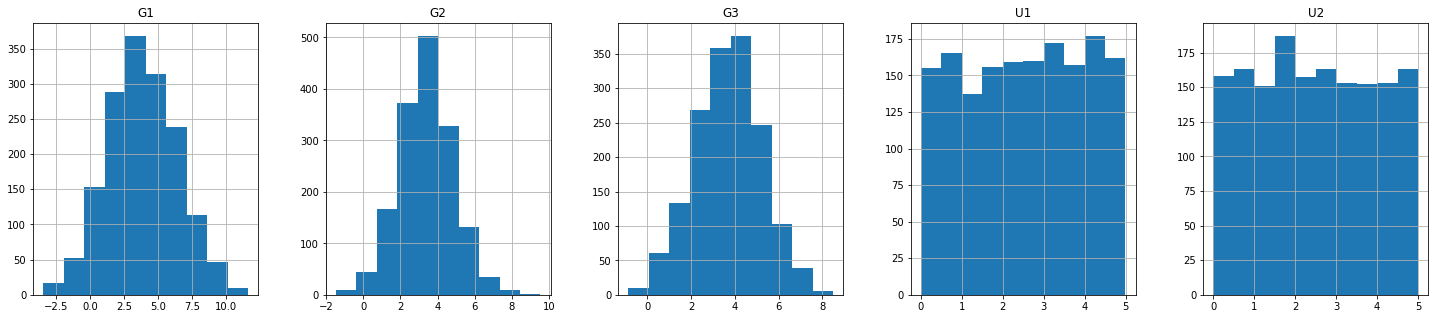

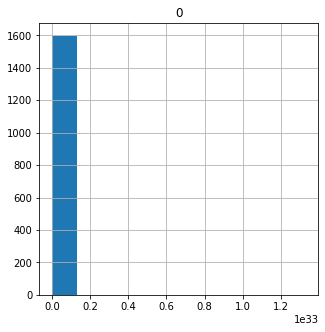

In [6]:
import matplotlib.pyplot as plt

X_train.hist(layout=(1,5), figsize=(25,5))
plt.show()

y_train.hist(figsize=(5,5))
plt.show()

Examining the histograms, we notice that the `X` features include 3 features with a normal distribution and 2 features with a uniform distribution. Also, we see that in the target the majority of the data are in the low portion of the range, with a long tail.

In the code cell below, we transform the two categorical features (not displayed above) to basic ordinal data ('a' is converted to 0.0, 'b' is converted to 1.0, etc). Then, we attempt to fit a linear model. We note the root mean squared error is very large and the $R^2$ score is very low.

We will not discuss the transformer process we used to transform the training and test data at this point. First, we will explore different methods to scale and transform data. Then, we will select and apply the appropriate transformations to our data.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


transformer = ColumnTransformer(
    transformers=
        [('categorical', OrdinalEncoder(), ['C1', 'C2'])],
        remainder='passthrough'
    )

# transform training data
X_train_transformed = transformer.fit_transform(X_train)

# fit linear model
linear = LinearRegression()
linear.fit(X_train_transformed, y_train)

# transform test data
X_test_transformed = transformer.transform(X_test)

# use model to make predictions, calculate error
y_pred = linear.predict(X_test_transformed)
rmse = mean_squared_error(y_test, y_pred)
r2 = linear.score(X_test_transformed, y_test)

display(md(f'RMSE: {rmse:.4e}'))
display(md(f'$R^2$: {r2:.4f}'))



RMSE: 1.5986e+63

$R^2$: 0.0432

## Data transformation methods

Before scaling and transforming our data, we will first review common scaling and transformation techniques.

In our data analysis, we note that both the `X` features and `y` targets have a relatively gaussian distribution. Many machine learning tasks require input data to have the same relative scale. Common scaling and normalization tools include:

- Data normalization rescales all data from its original range to $[0, 1]$:

  $x_i' = \frac{(x_i - x_{min})}{(x_{max} - x_{min})}$

  where $x$ represents one of the features, and $x_i$ is the $i^{th}$ observation of feature $x$. $x_{min}$ and $x_{max}$ are the minimum and maximum observations of feature $x$. $x_i'$ is the new feature value within the range $[0, 1]$. The `scikit-learn` package provides a utility for scaling all feature values with the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) and a slight variation, the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler). These techniques preserve the original distribution of the data and may be suitable for sparse data. One drawback of normalization is that extreme outliers will cause data to be squished toward one ond of the scale or another during normalization.

- Data standardization, also known as Z-score, is a scaling technique that ensures that all data have a mean of zero and unit variance:

  $x_i' = \frac{x_i - \mu_x}{\sigma_x}$

 where $\mu_x$ is the mean of $x$ and $\sigma_x$ is the standard deviation of $x$. The new feature value $x_i'$ represents a feature value such that all $x'$ have a zero mean and a standard deviation of 1. The [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) of the `scikit-learn` library provides this functionality. This technique is suitable for data that already have a normal distribution.

- Other methods of scaling and transforming data are common, including clipping, which clips all values that exceed a fixed value. Clipping is provided for in the `scikit-learn` [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) class. Log scaling is useful when data are not well distributed over the range with a high frequency of lower values with a long tail. Log scaling produces the power law distribution and can generate a more uniform distribution for data with a long tail. Both of these scaling methods are beyond the scope of this tutorial, but you can read more about them at [Google's Machine Learning Data Prep course](https://developers.google.com/machine-learning/data-prep/transform/normalization). Both clipping and log scaling can be followed with either normalization or standardization.

- Ordinal encoding is a technique applied to categorical data that assigns each category an ordinal value, such as {"cat": 3, "dog": 4}. A major drawback of ordinal encoding is that it implies a numerical relationship between categories of data where often none exists. On the other hand, when a natural ordering exists, such as in ordinal data, "1st", "2nd", "3rd",  the ordinal encoding approach may be appropriate. `scikit-learn` function [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) class provides this functionality. It may be appropriate to use ordinal encoding on categorical target data. For encoding `y` target category values, `scikit-learn` has provided the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) class.

- One-Hot encoding is appropriate for categorical variables where no numerical relationship exists. One-hot encoding takes the approach by assigning every observation a bit for every possible category. All bits are "turned off" except the one associated with the observation category. For example, "cat" and "dog" categories could be represented as $[1, 0]$ and $[0, 1]$, respectively. `scikit-learn` provides a one-hot encoding transformation in the [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) class

## Data scaling and transformation

Returning to our own data, we will select and apply the appropriate transformation for each feature.

- We observe that features `G1`, `G2`, and `G3` all have something that reflects a normal distribution. We will plan to apply a standardization, or Z-score, transformation to these features.
- Features `U1` and `U2` have a uniform distribution. We will normalize this data between -1 and 1 without changing the relative distance between observations.
- `C1` and `C2` are categorical data which we'll encode with one-hot encoding.
- Finally, the target exhibits a long tail, and we'll use log scaling to create a power distribution, which we will then normalize.

### Transform gaussian data

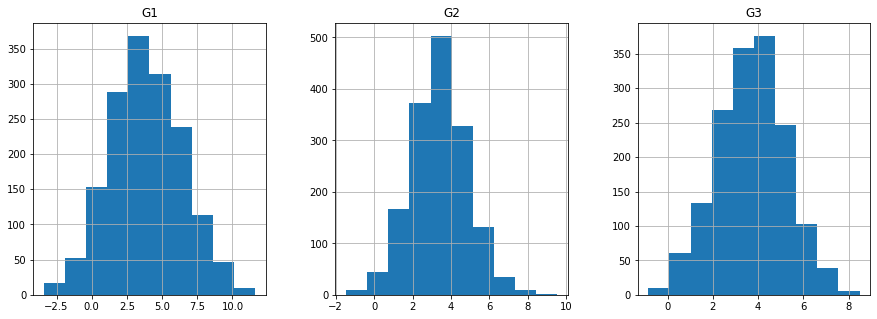

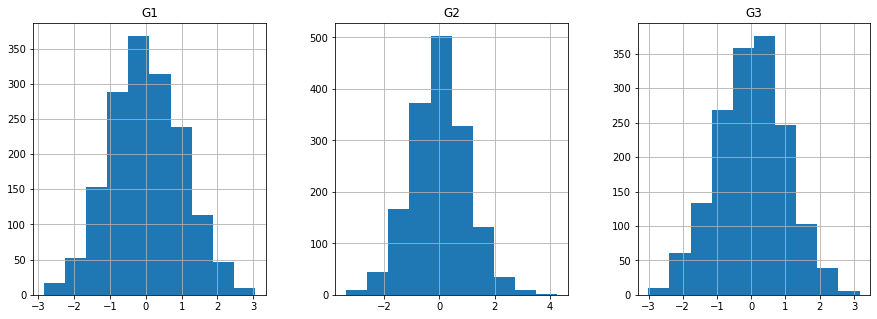

In [20]:
from sklearn.preprocessing import StandardScaler

X_train[['G1', 'G2', 'G3']].hist(layout=(1,3), figsize=(15,5))
plt.show()

scaler = StandardScaler()
X_train_gaussian = pd.DataFrame(scaler.fit_transform(X_train[['G1', 'G2', 'G3']]), columns=['G1', 'G2', 'G3'])
X_train_gaussian.hist(layout=(1,3), figsize=(15,5))
plt.show()

### Transform uniform data

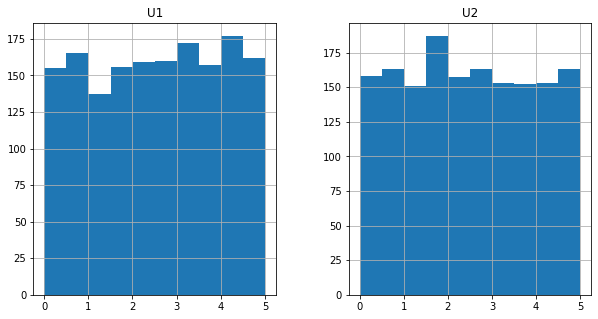

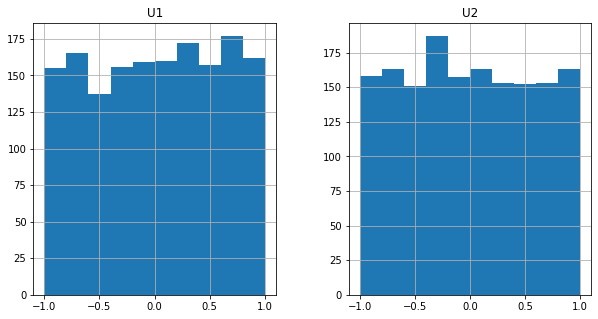

In [23]:
from sklearn.preprocessing import MinMaxScaler

X_train[['U1', 'U2']].hist(layout=(1,2), figsize=(10,5))
plt.show()

scaler = MinMaxScaler((-1, 1))
X_train_uniform = pd.DataFrame(scaler.fit_transform(X_train[['U1', 'U2']]), columns=['U1', 'U2'])
X_train_uniform.hist(layout=(1,2), figsize=(10,5))
plt.show()

### Transform categorical data

In [39]:
from sklearn.preprocessing import OneHotEncoder

display(X_train[['C1', 'C2']])

enc = OneHotEncoder()
enc.fit(X_train[['C1', 'C2']])
X_train_onehot = enc.transform(X_train[['C1', 'C2']]).toarray()
display(pd.DataFrame(X_train_onehot))

,C1,C2
1107,c,v
1719,c,z
735,b,y
1833,c,x
581,b,w
...,...,...
61,b,w
1001,b,v
222,b,x
1145,a,y


,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1595,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1596,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1597,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1598,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Transform target data

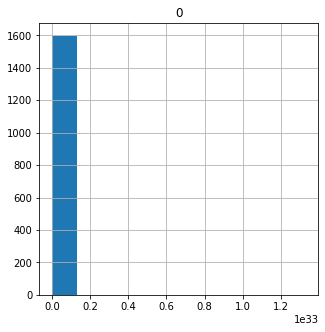

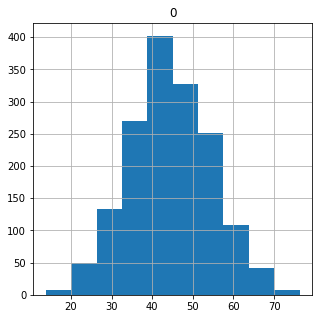

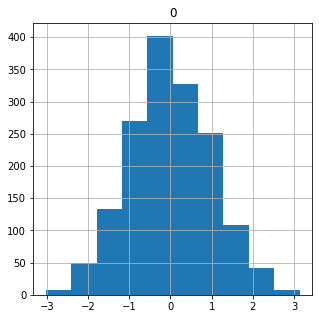

In [45]:
from sklearn.preprocessing import StandardScaler

y_train.hist(layout=(1,1), figsize=(5,5))
plt.show()

y_train_log = np.log(y_train)
y_train_log.hist(layout=(1,1), figsize=(5,5))
plt.show()

scaler = StandardScaler()

y_train_gaussian = pd.DataFrame(scaler.fit_transform(y_train_log[[0]]), columns=[0])
y_train_gaussian.hist(layout=(1,1), figsize=(5,5))
plt.show()
# X_train_uniform.hist(layout=(1,2), figsize=(10,5))
# plt.show()

Noting that our data has a normal distribution, we will standardize our data using the Z-score approach and the `scikit-learn` `StandardScaler` function.

In [8]:
import numpy as np
import pandas as pd
from IPython.display import Markdown as md

random_state = np.random.RandomState(623)

# instructor provided code
plot_x_min = -2.
plot_x_max = 2.

def generate_data(random_state, quantity = 200):


    np.random.seed(seed)
    x = np.random.uniform(low=plot_x_min,high=plot_x_max,size=quantity)
    order = np.random.randint(2, 3)
    betas = np.random.uniform(-2, 2, order)

    y = sum((beta * x ** (idx+1) for idx, beta in enumerate(betas)))

    beta0 = np.random.uniform(np.min(y), np.max(y))

    noise = np.random.normal(size=quantity, scale = (np.max(y) - np.min(y)) / 8)
    if test_data: # get new sample if we're generating test data
        noise = np.random.normal(size=quantity, scale = (np.max(y) - np.min(y)) / 8)

    y += noise + beta0

    df = pd.DataFrame({'x': x, 'y': y})

    globals()['global_betas'] = betas
    globals()['global_beta0'] = beta0

    return(df)



In [9]:
from sklearn.preprocessing import StandardScaler

# scaler_X = StandardScaler()
# scaler_y = StandardScaler()

# # fit and transform in one step
# X_train_normalized = scaler_X.fit_transform(X_train)
# # y_train_normalized = scaler_y.fit_transform(y_train.reshape(1, -1))
# y_train_normalized = np.squeeze(scaler_y.fit_transform(np.expand_dims(y_train, axis=1)))